In [14]:
import pandas as pd
import numpy as np
import geopandas
import geopy
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('data_energy.csv',sep=";")
data.iloc[:,9] = data.iloc[:,9].astype(float,copy=False)
data

,OPERATEUR,CODE_EIC,ANNEE,FILIERE,IRIS_CODE,IRIS_LIBELLE,ADRESSE,NOM_COMMUNE,CODE_GRAND_SECTEUR,CONSO,PDL
0,RTE,RTE 10XFR-RTE,2020,E,831370101,Bon Rencontre-Arsenal,CHEMIN DE BELLO VISTO,TOULON,I,109008.35400,1
1,RTE,RTE 10XFR-RTE,2020,E,831370612,La Rode,PORT MILITAIRE DE TOULON - QUAI VAUBAN,TOULON,I,45797.93800,1
2,Enedis,17X100A100A0001A,2020,E,330630901,Saint-Augustin 1,RUE DE LA PELOUSE DE DOUET,BORDEAUX,T,38101.91567,1
3,Enedis,17X100A100A0001A,2020,E,452342103,Universités,AVENUE DE L HOPITAL,ORLÉANS,T,30863.15683,1
4,Enedis,17X100A100A0001A,2020,E,352381001,Pontchaillou,2 RUE HENRI LE GUILLOUX,RENNES,T,29535.96109,2
...,...,...,...,...,...,...,...,...,...,...,...
15521,Enedis,17X100A100A0001A,2020,E,330630302,Chartrons-Grand Parc 2,58 QUAI DES CHARTRONS,BORDEAUX,T,0.00500,1
15522,Enedis,17X100A100A0001A,2020,E,452340401,Carmes Sud,1 RUE DU PONT DE CE,ORLÉANS,T,0.00400,1
15523,Enedis,17X100A100A0001A,2020,E,452341101,Sonis-Saint-Jean,90 RUE DU FAUBOURG SAINT JEAN,ORLÉANS,I,0.00344,1
15524,Enedis,17X100A100A0001A,2020,E,330630505,Hôtel de Ville-Quinconces 5,19 PLACE DES BASQUES,BORDEAUX,T,0.00220,1


In [11]:
data.loc[:,"ADRESSE_ENTIERE"] = data.iloc[:,6] + ", " +data.iloc[:,7]
data

,OPERATEUR,CODE_EIC,ANNEE,FILIERE,IRIS_CODE,IRIS_LIBELLE,ADRESSE,NOM_COMMUNE,CODE_GRAND_SECTEUR,CONSO,PDL,ADRESSE_ENTIERE
0,RTE,RTE 10XFR-RTE,2020,E,831370101,Bon Rencontre-Arsenal,CHEMIN DE BELLO VISTO,TOULON,I,109008.35400,1,"CHEMIN DE BELLO VISTO, TOULON"
1,RTE,RTE 10XFR-RTE,2020,E,831370612,La Rode,PORT MILITAIRE DE TOULON - QUAI VAUBAN,TOULON,I,45797.93800,1,"PORT MILITAIRE DE TOULON - QUAI VAUBAN, TOULON"
2,Enedis,17X100A100A0001A,2020,E,330630901,Saint-Augustin 1,RUE DE LA PELOUSE DE DOUET,BORDEAUX,T,38101.91567,1,"RUE DE LA PELOUSE DE DOUET, BORDEAUX"
3,Enedis,17X100A100A0001A,2020,E,452342103,Universités,AVENUE DE L HOPITAL,ORLÉANS,T,30863.15683,1,"AVENUE DE L HOPITAL, ORLÉANS"
4,Enedis,17X100A100A0001A,2020,E,352381001,Pontchaillou,2 RUE HENRI LE GUILLOUX,RENNES,T,29535.96109,2,"2 RUE HENRI LE GUILLOUX, RENNES"
...,...,...,...,...,...,...,...,...,...,...,...,...
15521,Enedis,17X100A100A0001A,2020,E,330630302,Chartrons-Grand Parc 2,58 QUAI DES CHARTRONS,BORDEAUX,T,0.00500,1,"58 QUAI DES CHARTRONS, BORDEAUX"
15522,Enedis,17X100A100A0001A,2020,E,452340401,Carmes Sud,1 RUE DU PONT DE CE,ORLÉANS,T,0.00400,1,"1 RUE DU PONT DE CE, ORLÉANS"
15523,Enedis,17X100A100A0001A,2020,E,452341101,Sonis-Saint-Jean,90 RUE DU FAUBOURG SAINT JEAN,ORLÉANS,I,0.00344,1,"90 RUE DU FAUBOURG SAINT JEAN, ORLÉANS"
15524,Enedis,17X100A100A0001A,2020,E,330630505,Hôtel de Ville-Quinconces 5,19 PLACE DES BASQUES,BORDEAUX,T,0.00220,1,"19 PLACE DES BASQUES, BORDEAUX"


In [17]:
geopandas.tools.geocode(data.iloc[:100,11])

,geometry,address
0,POINT (5.89041 43.13410),"Chemin Belle Visto, 83196, Toulon, Provence-Al..."
1,GEOMETRYCOLLECTION EMPTY,None
2,POINT (-0.60671 44.82989),"Rue de la Pelouse de Douet, 33000, Bordeaux, N..."
3,POINT (1.92553 47.83908),"Avenue de l'Hôpital, 45100, Orléans, Centre-Va..."
4,POINT (-1.69486 48.12074),"Hôpital Pontchaillou, 2, Rue Henri Le Guilloux..."
...,...,...
95,POINT (-0.58807 44.83307),"Rue François de Sourdis, 33000, Bordeaux, Nouv..."
96,POINT (1.89417 47.91402),"Rue du Parc, 45000, Orléans, Centre-Val de Loi..."
97,POINT (-1.71577 48.11326),"Allée Ermengarde d'Anjou, 35043, Rennes, Breta..."
98,POINT (5.94722 43.12327),"Avenue Georges Bizet, 83041, Toulon, Provence-..."


In [19]:
sf = geopandas.read_file('departements.geojson')
sf.head()

,code,nom,geometry
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ..."
1,02,Aisne,"POLYGON ((3.17296 50.01131, 3.17382 50.01186, ..."
2,03,Allier,"POLYGON ((3.03207 46.79491, 3.03424 46.79080, ..."
3,04,Alpes-de-Haute-Provence,"POLYGON ((5.67604 44.19143, 5.67817 44.19051, ..."
4,05,Hautes-Alpes,"POLYGON ((6.26057 45.12685, 6.26417 45.12641, ..."


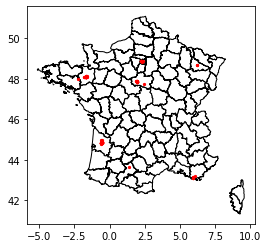

In [22]:
base = sf.plot(color='white', edgecolor='black')
villes = geopandas.tools.geocode(data.iloc[:100,11])
villes.plot(ax=base, marker='o', color='red', markersize=5)

<AxesSubplot:>

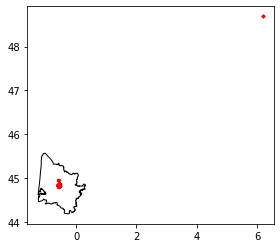

In [34]:
base = sf[sf.iloc[:,0]=="33"].plot(color='white', edgecolor='black')
villes = geopandas.tools.geocode(data[data.iloc[:,7]=="BORDEAUX"].iloc[:100,11])
villes.plot(ax=base, marker='o', color='red', markersize=5)

<AxesSubplot:>